## 説明変数
1. 触媒の化学構造
2. 基質の化学構造

(配位子、活性金属中心、反応物の構造や反応中間体を想定して記述子を作成するなど)

## 目的変数
1. 収率(%)

## 評価
#### r2
精度の評価関数
0 ~ 100 %であり、1に近いほど良い。
「残差平方和÷全平方和」
#### MRE
平均二乗誤差（MSE：Mean Squared Error）
予測値と正解値の差であり0であるほど良い。
「予測値 - 実測値」
#### RMSE
MREの平方根

## RDkit
ケモインフォマティクス

#### モンガーフィンガープリント(Morgan Fingerprints)
#### 
RDKitフィンガープリント
MinHashフィンガープリント


## スケーリング
#### 標準化
平均を0、分散を1とするスケーリング手法
(x_i - μ_x) / σ_x
(x - 平均) / 標準偏差

○いつ使うか？
最大値及び最小値が決まっていない場合
外れ値が存在する場合

#### 正規化(min-max)
最小値を0、最大値を1とする0-1スケーリング手法
(x_i - x_min) / (x_max - x_min)

○いつ使うか？
最大値及び最小値が決まっている場合


＊ サンプル数50以上は欲しい。

In [1]:
import rdkit

In [2]:
import pubchempy as pcp
from rdkit import Chem

benzene = pcp.get_compounds('benzene', 'name')
if len(benzene) == 1: benzene = benzene[0]
smiles = benzene.canonical_smiles
print(smiles) # 'C1=CC=CC=C1'
mol_ben = Chem.MolFromSmiles(smiles)
print(type(mol_ben)) # 
print(Chem.MolToMolBlock(mol_ben))

C1=CC=CC=C1
<class 'rdkit.Chem.rdchem.Mol'>

     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [3]:
import pandas as pd

In [4]:
table1 = pd.read_csv("table1.csv", header=0)

In [5]:
table1

,x,y,solvent,solvent_smiles,solvent_ml,additive,additive_mmol,atmosphere(MPa),yield(%)
0,0.5,0.025,CH3OH,CO,0.50,none,0.000,0.100000,5
1,0.5,0.025,CHCl3,ClC(Cl)Cl,0.50,none,0.000,0.100000,8
2,0.5,0.025,CH3CN,CC#N,0.50,none,0.000,0.100000,14
3,0.5,0.025,EtOAc,CC(OCC)=O,0.50,none,0.000,0.100000,16
4,0.5,0.025,toluene,CC1=CC=CC=C1,0.50,none,0.000,0.100000,27
5,0.5,0.025,DMF,CN(C([H])=O)C,0.50,none,0.000,0.100000,14
6,0.5,0.025,DMSO,CS(C)=O,0.50,none,0.000,0.100000,45
7,1.0,0.025,DMSO,CS(C)=O,0.50,none,0.000,0.100000,56
8,1.0,0.025,DMSO,CS(C)=O,0.50,none,0.000,0.101325,60
9,1.0,0.025,DMSO,CS(C)=O,0.10,none,0.000,0.101325,64


In [6]:
import numpy as np
from rdkit.Chem import AllChem

mols = [Chem.MolFromSmiles(smile) for smile in table1["solvent_smiles"]]

fingerprints = []
safe = []
for mol_idx, mol in enumerate(mols):
    try:
        fingerprint = [x for x in Chem.AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)]
        fingerprints.append(fingerprint)
    except e:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints)        

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
df_fp = pd.DataFrame(fingerprints)
df = pd.concat([table1.iloc[:,:2], table1.iloc[:,4], table1.iloc[:,7:9], df_fp], axis=1)
X = pd.concat([table1.iloc[:,:2], table1.iloc[:,4], table1.iloc[:,7], df_fp], axis=1)
y = table1.iloc[:,8]

In [8]:
df.to_csv("df1.csv")

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0) 

In [10]:
print(df_fp)

    0     1     2     3     4     5     6     7     8     9     ...  2038  \
0      0     0     0     0     0     0     0     0     0     0  ...     0   
1      0     1     0     0     0     0     0     0     0     0  ...     0   
2      0     0     0     0     0     0     0     0     0     0  ...     0   
3      0     0     0     0     0     0     0     0     0     0  ...     0   
4      0     0     0     0     0     0     0     0     0     0  ...     0   
5      0     0     0     0     0     0     0     0     0     0  ...     0   
6      0     0     0     0     0     0     0     0     0     0  ...     0   
7      0     0     0     0     0     0     0     0     0     0  ...     0   
8      0     0     0     0     0     0     0     0     0     0  ...     0   
9      0     0     0     0     0     0     0     0     0     0  ...     0   
10     0     0     0     0     0     0     0     0     0     0  ...     0   
11     0     0     0     0     0     0     0     0     0     0  ...     0   

/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. 

R2= 0.9060912995552919
RMSE= 7.463128945942267
MAE= 5.153799603174603


/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family

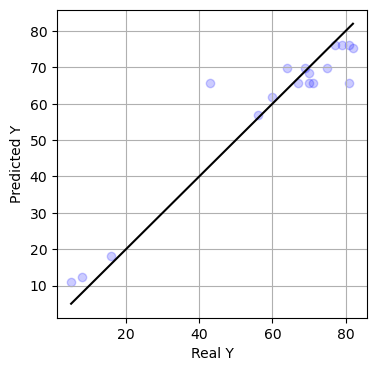

/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. 

-----test-----
R2= 0.8393377714923063
RMSE= 10.35530771127421
MAE= 8.045160317460317


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

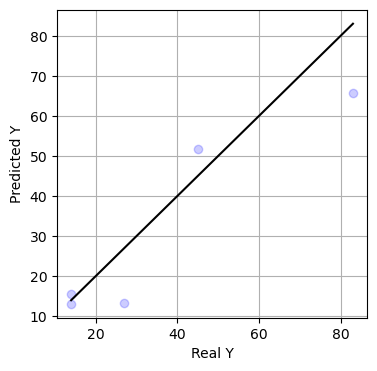

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

from sklearn.metrics import r2_score
print("R2=", r2_score(y_train, rf.predict(X_train)))

import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE=", np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))

from sklearn.metrics import mean_absolute_error
print("MAE=", mean_absolute_error(y_train, rf.predict(X_train)))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_train, rf.predict(X_train), alpha=0.2, c="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

print('-----test-----')
print("R2=", r2_score(y_test, rf.predict(X_test)))
print("RMSE=", np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))
print("MAE=", mean_absolute_error(y_test, rf.predict(X_test)))
plt.figure(figsize=(4,4))
plt.scatter(y_test, rf.predict(X_test), alpha=0.2, c="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [12]:
print(X_train.shape)
print(X_test.shape)

(18, 2052)
(5, 2052)


In [13]:
# エンカメの予測
# ClCCl
mol_chcl2 = Chem.MolFromSmiles("ClCCl")
fp_chcl2 = Chem.AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
fp_chcl2 = pd.DataFrame([np.array(fp_chcl2)])

names_chcl2 = ['x','y', 'solvent_ml', 'atmosphere']
x_chcl2 = pd.DataFrame([[0.5, 0.025, 0.5, 0.1]], columns=names_chcl2)

x_chcl2 = pd.concat([x_chcl2, fp_chcl2],axis=1) 

In [14]:
rf.predict(x_chcl2)

/Users/watanabeyuitou/opt/anaconda3/envs/chem/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([51.85833333])

In [15]:
from dtreeviz.trees import dtreeviz
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Importance')

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

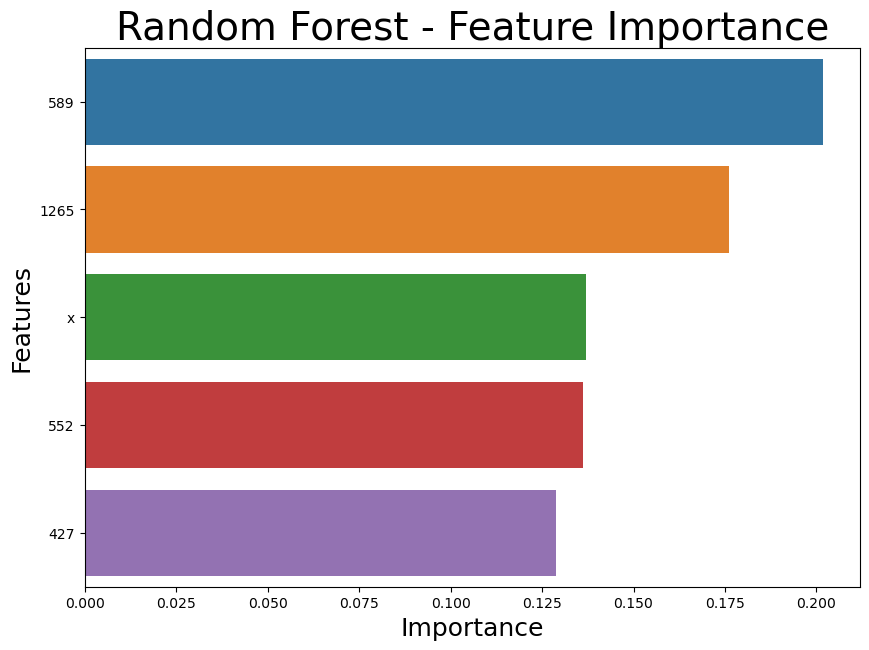

In [16]:
fea_rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train.keys()})
fea_rf_imp = fea_rf_imp.sort_values(by='imp', ascending=False)[:5]

plt.figure(figsize=(10, 7))
sns.barplot(x='imp',y='col',data=fea_rf_imp,orient='h')
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importance',fontsize=18)

In [17]:
# from sklearn.preprocessing import StandardScaler
# col = [x,y,

SyntaxError: unexpected EOF while parsing (46967552.py, line 2)